### Notebook Purpose

Gain insight into why gradient flow is inhibited when we fix the some values of output

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def sigmoid(x):
    return np.divide(1, (1 + np.exp(-x)))

def forward_prop(xx, ww, bb):
    zh1 = ww[0]*xx[0] + ww[2]*xx[1] + bb[0]
    zh2 = ww[1]*xx[0] + ww[3]*xx[1] + bb[1]
    h1 = sigmoid(zh1)
    h2 = sigmoid(zh2)
    zo1 = ww[4]*h1 + ww[6]*h2 + bb[1]
    zo2 = ww[5]*h1 + ww[7]*h2 + bb[1]
    o1 = sigmoid(zo1)
    o2 = sigmoid(zo2)
    return h1, h2, o1, o2

def error(oo, tt):
    return 0.5 * (np.power(oo[0] - tt[0], 2) + np.power(oo[1] - tt[1], 2))

In [76]:
num_iter = 5000
alpha = 0.01

ww = np.random.uniform(size=8)
bb = [0.5, 0.5]
xx = [1, 4]

# tt = [0.1, 0.05]
tt = [0.1, 0.05]

error_list = []

for i in range(num_iter):
    
    h1, h2, o1, o2 = forward_prop(xx, ww, bb)
#     o1 = 0.1
    h1 = 0.1
    
    error_list.append(error([o1, o2], tt))
    
    # preliminaries, second layer - including sigmoid
    dE_do1 = (o1 - t1) * (o1 * (1-o1))
    dE_do2 = (o2 - t2) * (o2 * (1-o2))
    
    # derivs, second layer
    dE_dw5 = dE_do1 * h1
    dE_dw6 = dE_do2 * h1
    dE_dw7 = dE_do1 * h2
    dE_dw8 = dE_do2 * h2
    dE_db2 = dE_do1 * 1 + dE_do2 * 1
    
    # preliminaries, first layer
    dE_dh1 = (dE_do1 * ww[4] + dE_do2 * ww[5]) * (h1 * (1 - h1))
    dE_dh2 = (dE_do1 * ww[6] + dE_do2 * ww[7]) * (h2 * (1 - h2))
    
    # derivs, first layer
    dE_dw1 = dE_dh1 * xx[0]
    dE_dw2 = dE_dh2 * xx[0]
    dE_dw3 = dE_dh1 * xx[1]
    dE_dw4 = dE_dh2 * xx[1]
    dE_db1 = dE_dh1 * 1 + dE_dh2 * 1
    
    dE_dww = [dE_dw1, dE_dw2, dE_dw3, dE_dw4, dE_dw5, dE_dw6, dE_dw7, dE_dw8]
    dE_dbb = [dE_db1, dE_db2]
    
    for idx, w_ in enumerate(ww):
        ww[idx] = w_ - alpha*dE_dww[idx]
    for idx, b_ in enumerate(bb):
        bb[idx] = b_ - alpha*dE_dbb[idx]

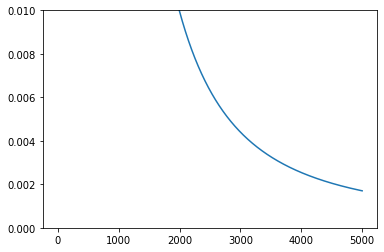

In [77]:
plt.plot(error_list)
plt.ylim(0, 0.01)
plt.show()

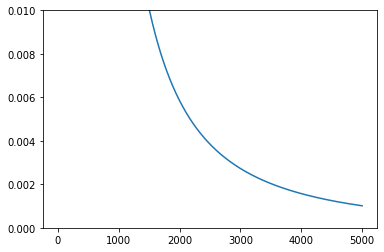

In [73]:
plt.plot(error_list)
plt.ylim(0, 0.01)
plt.show()